# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

ANS : To handle the character variables in our input dataset (X). we would have to make use of character-based, categorical variables in our modeling efforts. So, we’ll need to dummify the values, which are species, island and sex.

In [74]:
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [75]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [76]:
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'sex', 'species', 'island'])
cols_species_island = pd.get_dummies(penguins[['species', 'island']])
cols_sex = pd.get_dummies(penguins['sex'], drop_first=True)
df = penguins.drop(['species', 'island', 'sex'], axis=1)
df = pd.concat([df, cols_species_island, cols_sex], axis=1)
df
# cols = pd.get_dummies(penguins[['species', 'island', 'sex']])
# df = penguins.drop(['species', 'island', 'sex'], axis=1)
# df = pd.concat([df, cols], axis=1)
# df

# # Dummify 'sex' column with drop='first' and 'species' and 'island' columns without dropping a level
# ct = ColumnTransformer(
#     [("dummify_sex", OneHotEncoder(drop='first'), ['sex']),
#      ("dummify_species_island", OneHotEncoder(), ['species', 'island'])],
#     remainder='passthrough'
# )
# penguins_dummified = ct.fit_transform(penguins)
# penguins_dummified

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,2007,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1,0,1
340,43.5,18.1,202.0,3400.0,2009,0,1,0,0,1,0,0
341,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1,0,1
342,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1,0,1


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [77]:
y = df['bill_depth_mm']
X = df[['bill_length_mm']]

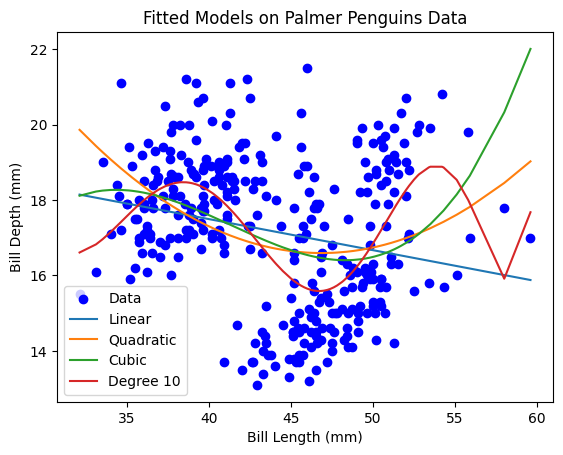

In [78]:
def create_pipeline(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('ols', LinearRegression())
    ])

linear_model = create_pipeline(1)
linear_model.fit(X, y)
y_linear = linear_model.predict(X)

quadratic_model = create_pipeline(2)
quadratic_model.fit(X, y)
y_quadratic = quadratic_model.predict(X)

cubic_model = create_pipeline(3)
cubic_model.fit(X, y)
y_cubic = cubic_model.predict(X)

degree10_model = create_pipeline(10)
degree10_model.fit(X, y)
y_degree10 = degree10_model.predict(X)
sorted_indices = X.squeeze().argsort()
X_sorted = X.iloc[sorted_indices]
y_sorted = y.iloc[sorted_indices]

y_linear_sorted = y_linear[sorted_indices]
y_quadratic_sorted = y_quadratic[sorted_indices]
y_cubic_sorted = y_cubic[sorted_indices]
y_degree10_sorted = y_degree10[sorted_indices]

plt.scatter(X_sorted, y_sorted, color='blue', label='Data')
plt.plot(X_sorted, y_linear_sorted, label='Linear')
plt.plot(X_sorted, y_quadratic_sorted, label='Quadratic')
plt.plot(X_sorted, y_cubic_sorted, label='Cubic')
plt.plot(X_sorted, y_degree10_sorted, label='Degree 10')
plt.legend()
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Fitted Models on Palmer Penguins Data')
plt.show()


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The Linear model seems to be underfitting the data. Underfitting is the scenario in which a model is unable to capture the relationship between the input(s) and the output variable accurately. the linear model is underfitting because it doesn't capture the curves which are in the data instead it just represent the data with a single straight line.


The model Degree 10 is overfitting the data. Overfitting is the scenario in which a model captures too much about the data its being trained on. That is, model is capturing the relationship between the input(s) and the output, but ALSO some of the noise or nuance present in the data. the degree 10 model is overfitting because it has too many moevemenet and tries to fit even the for the noise or we can say outliers and every values in the data, which are likely just random noise.

Based on the plot, the Cubic model is the best to dataset. It plot the general trend and curvature of the data without being overly simple .The Quadratic model also fits the data well, but the Cubic model plots to be a slightly better match.